# Redes Neurais Regressão

É uma rede neural em que:
+ A última camada tem apenas um único neurônio
+ A função de ativação na última camada é a função linear, que não faz nenhum processamento, sendo assim a saida o somatŕoio das entradas*pesos
+ Em geral, nas camadas ocultas se usa a função `relu`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../../files/"

## Base `plano_saude2`

In [3]:
base = pd.read_csv(file_path + 'plano_saude2.csv')

X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [4]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()
regressor.fit(X, y)

/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [5]:
# Score no Treinamento
regressor.score(X, y)

0.8757306378421612

Text(0, 0.5, 'Custo')

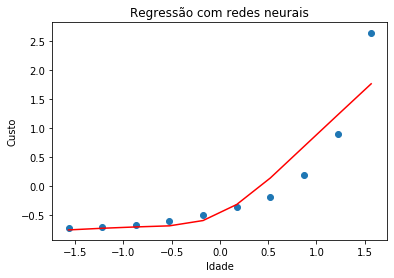

In [6]:
# Gráfico
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Regressão com redes neurais')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [7]:
# Prever dados
previsao = scaler_y.inverse_transform(regressor.predict(scaler_x.transform(np.array(40).reshape(1, -1))))

## Base `house_prices`

In [9]:
base = pd.read_csv(file_path + 'house-prices.csv')

X = base.iloc[:, 3:19].values
y = base.iloc[:, 2:3].values

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes = (9,9))
regressor.fit(X_treinamento, y_treinamento)

/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 9), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [11]:
score_train = regressor.score(X_treinamento, y_treinamento)
score_train

0.887851714904307

In [12]:
score_test = regressor.score(X_teste, y_teste)
score_test

0.8664911141576204

In [13]:
previsoes = regressor.predict(X_teste)
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_teste, previsoes)
print("MAE - MeanAbsoluteError ==>", mae)
mse = mean_squared_error(y_teste, previsoes)
print("MSE - MeanSquareError   ==>", mse)

MAE - MeanAbsoluteError ==> 78866.5632369949
MSE - MeanSquareError   ==> 18329695498.146996
